In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with 80% and 20% split between training and evaluation (test) sets.

In [55]:
# Setup Code
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, mean_squared_error
from IPython.display import display
from scipy import stats

# Cancer dataset for problem 1
cancer_data = pd.DataFrame(np.concatenate([pd.DataFrame(datasets.load_breast_cancer().data), np.reshape(pd.DataFrame(datasets.load_breast_cancer().target),(569,1))],axis=1))
cancer_data.columns = np.append(datasets.load_breast_cancer().feature_names ,'label')
cancer_label = cancer_data.pop('label')
scaler = StandardScaler()
cancer_data = pd.DataFrame(scaler.fit_transform(cancer_data))
#print(cancer_data.head())

# Housing dataset for problem 2
def data_map(x):
  return x.map({'yes': 1, 'no' : 0, 'furnished' : 1, 'semi-furnished' : 0.5, 'unfurnished' : 0})
housing_data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')
data_nan_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing_data[data_nan_columns] = housing_data[data_nan_columns].apply(data_map)
housing_price = housing_data.pop('price')
# Select the features used in problem 2
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', \
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
housing_data = housing_data[features]
scaler = StandardScaler()
housing_data = pd.DataFrame(scaler.fit_transform(housing_data, housing_price))
print(housing_data.head(), '\n', housing_price.head())
#print(housing_data.head())

         0         1         2         3         4         5         6   \
0  1.046726  1.403419  1.421812  1.378217  0.405623 -0.465315 -0.734539   
1  1.757010  1.403419  5.405809  2.532024  0.405623 -0.465315 -0.734539   
2  2.218232  0.047278  1.421812  0.224410  0.405623 -0.465315  1.361397   
3  1.083624  1.403419  1.421812  0.224410  0.405623 -0.465315  1.361397   
4  1.046726  1.403419 -0.570187  0.224410  0.405623  2.149083  1.361397   

         7         8         9         10  
0 -0.219265  1.472618  1.517692  1.804941  
1 -0.219265  1.472618  2.679409 -0.554035  
2 -0.219265 -0.679063  1.517692  1.804941  
3 -0.219265  1.472618  2.679409  1.804941  
4 -0.219265  1.472618  1.517692 -0.554035   
 0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


Problem 1 (50pts):

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels. Compare your results against the logistic regression that you have done in homework 3.

Make sure to explain and elaborate your results.

,accuracy,precision,recall
linear,0.956140,0.971429,0.957746
poly,0.938596,0.970588,0.929577
rbf,0.938596,0.970588,0.929577
sigmoid,0.956140,0.934211,1.000000


<Figure size 640x480 with 0 Axes>

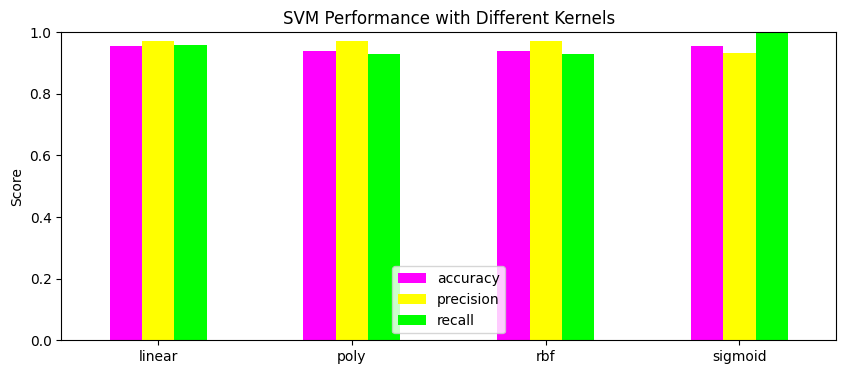

In [56]:
# Split the data into training and testing sets
cancer_data_train, cancer_data_test, cancer_label_train, cancer_label_test = \
  train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=42)

# Create an SVM classifier for each kernel type
# - Messed with kernel tricks/settings to capture non-linearity
max_iterations = 100000
svm_linear = SVC(kernel='linear', C=math.exp(0.5), tol=1e-3, max_iter=max_iterations)
  # Changed regularization parameter
svm_poly = SVC(kernel='poly', C=1e3, degree=4, gamma='auto', coef0=1, tol=1e-3, max_iter=max_iterations)
  # Changed regularization parameter, gamma, degree & coef0
svm_rbf = SVC(kernel='rbf', C=1e2, gamma='scale', tol=1e-3, max_iter=max_iterations)
  # Changed regularization parameter & gamma
svm_sigmoid = SVC(kernel='sigmoid', C=1e3, gamma='scale', coef0=-5.5, tol=1e-3, max_iter=max_iterations)
  # Changed regularization parameter, gamma, coef0

# Train the classifier for each kernel
svm_linear.fit(cancer_data_train, cancer_label_train)
svm_poly.fit(cancer_data_train, cancer_label_train)
svm_rbf.fit(cancer_data_train, cancer_label_train)
svm_sigmoid.fit(cancer_data_train, cancer_label_train)

# Make predictions on the test set
pred_linear = svm_linear.predict(cancer_data_test)
pred_poly = svm_poly.predict(cancer_data_test)
pred_rbf = svm_rbf.predict(cancer_data_test)
pred_sigmoid = svm_sigmoid.predict(cancer_data_test)
predictions = [pred_linear, pred_poly, pred_rbf, pred_sigmoid]

# Evaluate the classifiers against test dataset
results = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i, current_prediction in enumerate(predictions):
  # Calculate accuracy, precision, recall
  accuracy = accuracy_score(cancer_label_test, current_prediction)
  precision = precision_score(cancer_label_test, current_prediction)
  recall = recall_score(cancer_label_test, current_prediction)

  # Store results
  results[kernels[i]] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

  # Output/debugging
  """
  print("Kernel: ", kernels[i])
  print("Accuracy: ", accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall, "\n")
  """

# Create table of results
results_df = pd.DataFrame(results).T
display(results_df)

# Plot results (bar chart)
plt.clf()
results_df[['accuracy', 'precision', 'recall']].plot(kind='bar', figsize=(10, 4), color = ['fuchsia', 'yellow', 'lime'])
plt.title('SVM Performance with Different Kernels')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.show()

Problem 2 (50pts):

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Plot your regression model for SVR similar to the sample code provided on the course GitHub. Compare your results against linear regression with regularization loss that you already did in homework1. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


1981274154799.693
2065729550137.273
1968238672368.6228


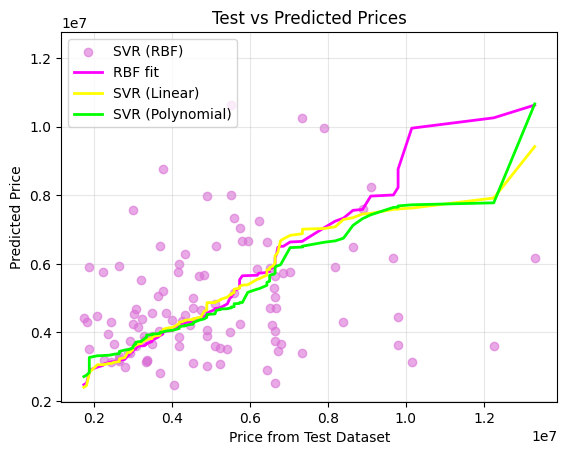

In [97]:
# Split the data into training and testing sets
housing_data_train, housing_data_test, housing_price_train, housing_price_test = \
  train_test_split(housing_data, housing_price, test_size=0.2, random_state=42)

# Create SVR models with different kernel types
svr_linear = SVR(kernel='linear', max_iter=max_iterations, epsilon=0.1, C=1e7)
svr_poly = SVR(kernel='poly', max_iter=max_iterations, C=1e3, degree=5, coef0=2.0)
svr_rbf = SVR(kernel='rbf', max_iter=max_iterations, C=1e7)

# Train the SVR models
svr_linear.fit(housing_data_train, housing_price_train)
svr_poly.fit(housing_data_train, housing_price_train)
svr_rbf.fit(housing_data_train, housing_price_train)

# Make predictions on the test set
pred_linear_svr = svr_linear.predict(housing_data_test)
pred_poly_svr = svr_poly.predict(housing_data_test)
pred_rbf_svr = svr_rbf.predict(housing_data_test)
svr_predictions = [pred_linear_svr, pred_poly_svr, pred_rbf_svr]

# Evaluate the SVR models
def compute_loss (prediction, target):
  # Calculates mean squared error
  return mean_squared_error(target, prediction)
svr_results = {}
svr_kernels = ['linear', 'poly', 'rbf']
#print(pd.DataFrame(pred_linear_svr)) # FIXME
for i, current_prediction in enumerate(svr_predictions):
  # Calculate the loss
  print(compute_loss(current_prediction, housing_price_test))

housing_price_test_sorted = np.sort(housing_price_test)

plt.clf()
plt.scatter(housing_price_test.to_numpy(), np.sort(pred_rbf_svr), color='orchid', label='SVR (RBF)', alpha=0.6)
plt.plot(housing_price_test_sorted, np.sort(pred_rbf_svr), color='fuchsia', lw=2, label='RBF fit')
plt.plot(housing_price_test_sorted, np.sort(pred_linear_svr), color='yellow', lw=2, label='SVR (Linear)')
plt.plot(housing_price_test_sorted, np.sort(pred_poly_svr), color='lime', lw=2, label='SVR (Polynomial)')
plt.xlabel('Price from Test Dataset')
plt.ylabel('Predicted Price')
plt.title('Test vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(min(pred_rbf_svr)*0.8, max(pred_rbf_svr)*1.2)
plt.show()